# Car, model, volume, weight, co2 emmission : a data set with higher dimensional
## Using ScieKit Learn
### This code reads the car data from the CSV file, extracts the features and target variable, creates a linear regression model using scikit-learn's LinearRegression class, fits the model to the data, predicts the CO2 emission for a specific car, and prints the coefficients of the linear regression model.

In [62]:
import pandas as pd
from sklearn import linear_model

# Read the CSV file into a DataFrame
df = pd.read_csv("/home/ies/Desktop/ML/Machine_Learning_2018/2-Regression/data/car_co.csv")

# Extract features ('Weight' and 'Volume') and target variable ('CO2')
X = df[['Weight', 'Volume']]
y = df['CO2']

# Create a linear regression model
regr = linear_model.LinearRegression()

# Fit the model to the data
regr.fit(X, y)

# Predict the CO2 emission for a car with weight 2300kg and volume 1300cm3
predictedCO2 = regr.predict([[2300, 1300]])

print("Predicted CO2 emission:", predictedCO2[0])

# Display the coefficients of the linear regression model
print("Coefficients:", regr.coef_)



Predicted CO2 emission: 107.20873279892223
Coefficients: [0.00755095 0.00780526]


/home/ies/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Using Normalization and plotting the results

Theta: [[7.96947193e+01]
 [7.55094727e-03]
 [7.80525753e-03]]


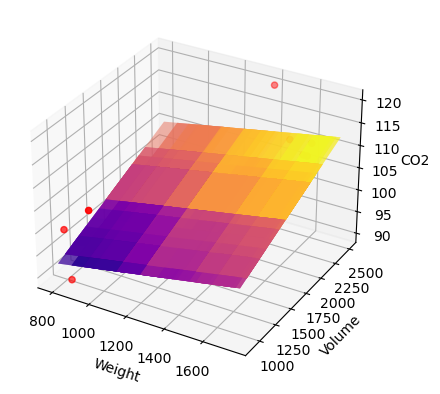

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from numpy.linalg import pinv  # pseudo Inverse

# Assuming your CSV file has columns 'Weight' and 'Volume'
file_path = "/home/ies/Desktop/ML/Machine_Learning_2018/2-Regression/data/car_co.csv"
df = pd.read_csv(file_path)

# Add a column of ones for the bias term
df['Bias'] = 1

# Extract the features and target variable
X = df[['Bias', 'Weight', 'Volume']]
y = df['CO2'].values.reshape(-1, 1)

# Calculate the parameters using the pseudo-inverse
theta = pinv(X) @ y

# Display the calculated parameters
print("Theta:", theta)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Weight'], df['Volume'], df['CO2'], c='r', marker='o')

# Plot the regression plane
xx, yy = np.meshgrid(df['Weight'], df['Volume'])
zz = theta[0] + theta[1] * xx + theta[2] * yy
ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='plasma')

# Add labels
ax.set_xlabel('Weight')
ax.set_ylabel('Volume')
ax.set_zlabel('CO2')

plt.show()



/home/ies/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


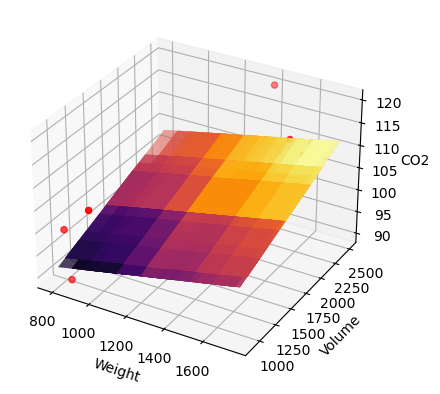

In [93]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a DataFrame
df = pd.read_csv("/home/ies/Desktop/ML/Machine_Learning_2018/2-Regression/data/car_co.csv")

# Extract features ('Weight' and 'Volume') and target variable ('CO2')
X = df[['Weight', 'Volume']]
y = df['CO2']

scale = StandardScaler()
X_normalized = scale.fit_transform(X)

gdreg = SGDRegressor(max_iter=1000, tol=5e-2)
gdreg.fit(X_normalized,y)

# Predict the amount of CO2
predicted_co = gdreg.predict(X_normalized)

# Reshape for consistency
predicted_co = predicted_co.reshape(-1, 1)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Weight'], df['Volume'], df['CO2'], c='r', marker='o')

# Plot the regression plane
xx, yy = np.meshgrid(df['Weight'], df['Volume'])
zz = gdreg.intercept_ + np.dot(scale.transform(np.c_[xx.ravel(), yy.ravel()]), gdreg.coef_.T)
zz = zz.reshape(xx.shape)

ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='inferno')

# Add labels
ax.set_xlabel('Weight')
ax.set_ylabel('Volume')
ax.set_zlabel('CO2')

plt.show()